In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_score

En este notebook se van a comparar los cuatro métodos de clustering vistos hasta ahora en clase: 1) clustering jerárquico aglomerativo; 2) clustering basado en centroides, como KMeans; 3) clustering basado en densidades, como DBSCAN; y 4) clustering basado en mezcla de gaussianas, como EM.

El objetivo de este notebook es introducir la necesidad de comparar los resultados de los diferentes algoritmos, ya que, dependiendo del problema, unos serán más eficientes que otros.

# Ejercicio 1

En este primer ejercicio se presenta un dataset de juguete, donde uno de los clusters envuelve al segundo. El objetivo es probar las diferentes configuraciones de los cuatro algoritmos de clustering y analizar los resultados.

In [2]:
x = []
y = []
x1 = []
y1 = []
for i in range(1,551):
    aux = random.gauss(0,1)
    x.append(aux)
    aux = random.gauss(0,1)
    y.append(aux)
    r = random.gauss(5,0.25)
    theta = random.uniform(0,2*math.pi)
    x1.append(r*math.cos(theta))
    y1.append(r*math.sin(theta))

x = np.array(x)
y = np.array(y)
x1 = np.array(x1)
y1 = np.array(y1)

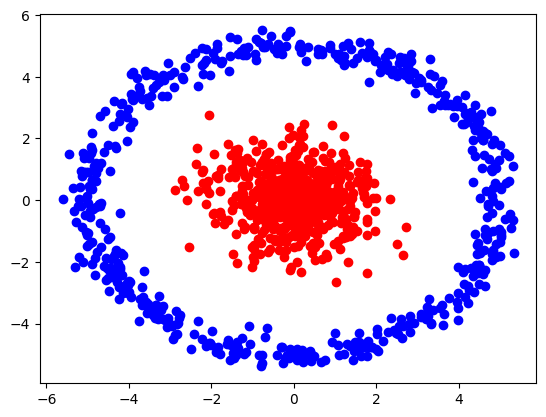

In [3]:
plt.plot(x,y,'ro')
plt.plot(x1,y1,'bo')
plt.show()

In [4]:
data = np.vstack((x,y)).T
data1 = np.vstack((x1,y1)).T
data = np.concatenate((data,data1))
data.shape

(1100, 2)

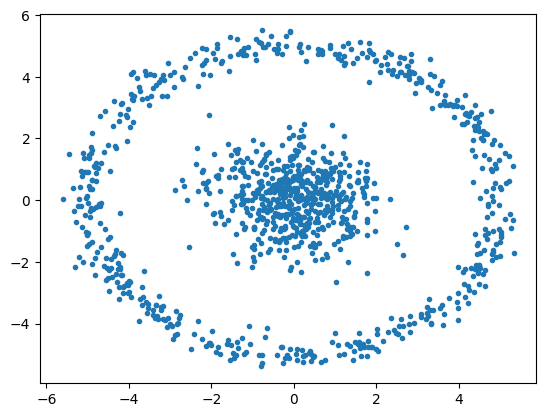

In [5]:
plt.plot(data[:,0],data[:,1],'.')
plt.show()

In [6]:
silhouette_avgs = {}

## Aglomerativo

Prueba diferentes técnicas de distancia (method) para poder partir correctamente las dos distribuciones.

In [7]:
# Prueba single, average, complete, centroid
method = 'single'
Z = linkage(data, method=method, metric='euclidean')

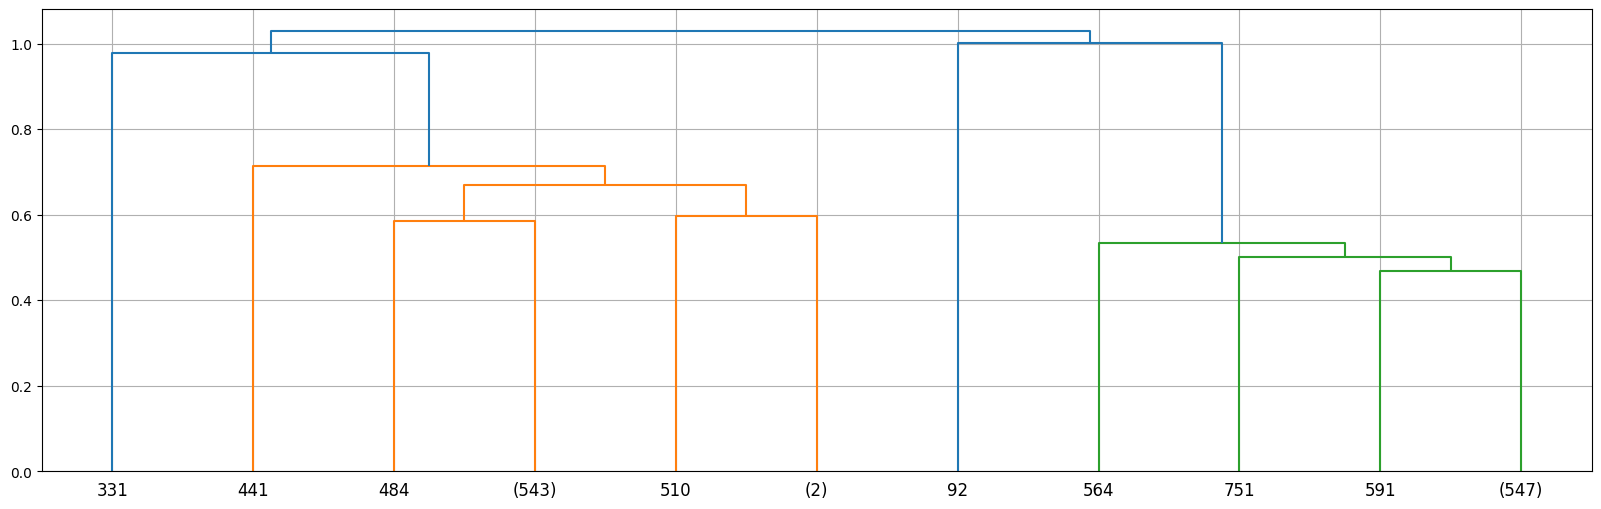

In [8]:
plt.figure(figsize=(20, 6))
dn = dendrogram(Z, p=4, truncate_mode='level')
plt.grid()
plt.show()

In [9]:
indices = fcluster(Z, 1.0, criterion='distance')
np.unique(indices)

array([1, 2, 3], dtype=int32)

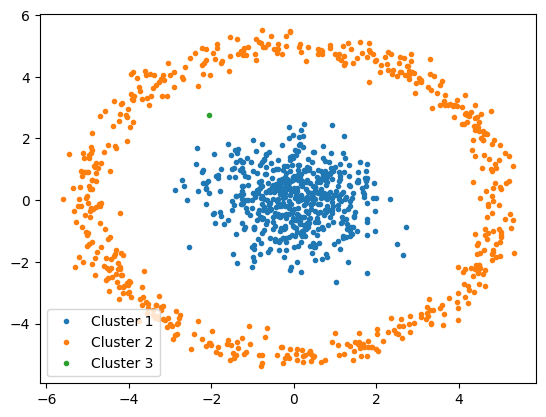

In [10]:
for i in np.unique(indices):
  plt.plot(data[indices == i, 0], data[indices == i, 1], '.', label="Cluster "+str(i))
plt.legend()
plt.show()

## K-Means

Prueba diferentes valores de K para poder partir correctamente las dos distribuciones.

In [16]:
kmeans = KMeans(n_clusters=8,n_init=30).fit(data)

In [17]:
kmeans.cluster_centers_

array([[-4.54546692,  0.77000825],
       [ 0.01645899,  0.06495402],
       [ 3.99646412, -2.49606057],
       [ 1.92707323,  4.44185176],
       [-3.84443542, -2.8850535 ],
       [ 4.44684684,  1.94188948],
       [-2.32442848,  4.26694958],
       [ 0.14548579, -4.78993405]])

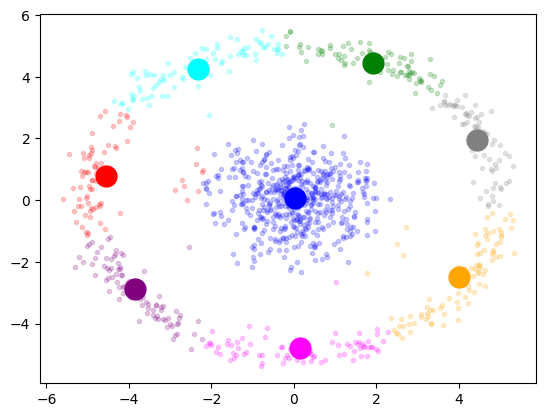

In [18]:
for label, color in zip(np.unique(kmeans.labels_), ['red', 'blue', 'orange', 'green', 'purple', 'grey', 'cyan', 'magenta', 'yellow']):
  plt.plot(data[kmeans.labels_ == label, 0], data[kmeans.labels_ == label, 1], '.', color=color, alpha=0.2, label="Cluster "+str(label))
  plt.plot([kmeans.cluster_centers_[label, 0]], [kmeans.cluster_centers_[label, 1]], 'o', markersize=15, color=color, label="Cluster center "+str(label))
#plt.legend()
plt.show()

In [19]:
silhouette_avgs = {}
for K in range(2, 10):
  kmeans = KMeans(n_clusters=K,n_init=30).fit(data)
  silhouette_avgs["K = " + str(K)] = silhouette_score(data, kmeans.labels_)

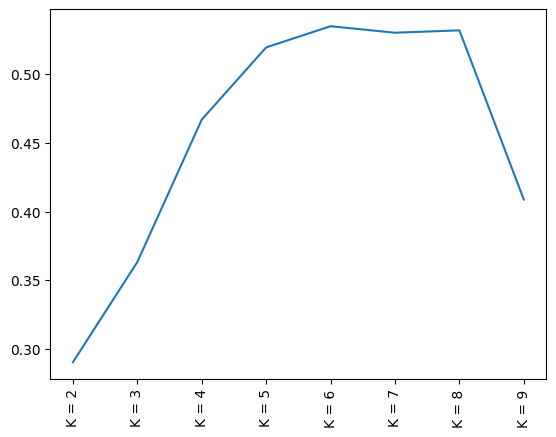

In [20]:
silh_by_clusters = pd.Series(silhouette_avgs)
silh_by_clusters.plot()
plt.xticks(rotation=90)
plt.show()

In [21]:
silh_by_clusters.idxmax()

'K = 6'

## EM

Prueba diferentes valores de K para poder partir correctamente las dos distribuciones.

In [29]:
em = GaussianMixture(n_components=6, n_init=30).fit(data)

In [30]:
em.means_

array([[-4.31879607, -1.53780128],
       [ 3.07334895,  3.59822322],
       [ 4.44153291, -1.59132483],
       [-2.32599901,  4.13603827],
       [-0.01116905,  0.0638982 ],
       [ 0.3962484 , -4.70507962]])

In [31]:
labels = em.predict(data)

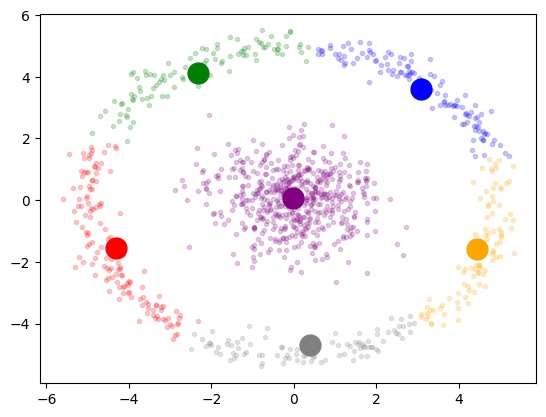

In [32]:
for label, color in zip(np.unique(labels), ['red', 'blue', 'orange', 'green', 'purple', 'grey', 'cyan', 'magenta', 'yellow']):
  plt.plot(data[labels == label, 0], data[labels == label, 1], '.', color=color, alpha=0.2, label="Cluster "+str(label))
  plt.plot([em.means_[label, 0]], [em.means_[label, 1]], 'o', markersize=15, color=color, label="Cluster center "+str(label))
#plt.legend()
plt.show()

In [26]:
silhouette_avgs = {}
for K in range(2, 10):
  em = GaussianMixture(n_components=K, n_init=30).fit(data)
  labels = em.predict(data)
  silhouette_avgs["K = " + str(K)] = silhouette_score(data, labels)

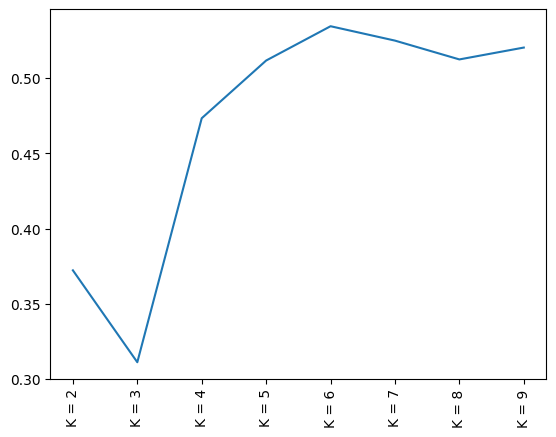

In [27]:
silh_by_clusters = pd.Series(silhouette_avgs)
silh_by_clusters.plot()
plt.xticks(rotation=90)
plt.show()

In [28]:
silh_by_clusters.idxmax()

'K = 6'

## DBSCAN

Prueba diferentes valores de eps y minPts para poder partir correctamente las dos distribuciones.

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=5).fit(data)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 1, 1])

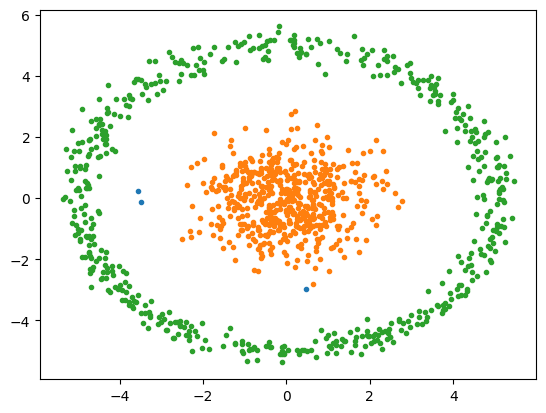

In [ ]:
for label in np.unique(dbscan.labels_):
  plt.plot(data[dbscan.labels_ == label, 0], data[dbscan.labels_ == label, 1], '.', label="Cluster "+str(label))
#plt.legend()
plt.show()

In [ ]:
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = np.arange(1, 21)
silhouette_avgs = np.zeros((len(eps_values), len(min_samples_values)))
for i, eps in enumerate(eps_values):
  for j, min_samples in enumerate(min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    try:
      silhouette_avgs[i, j] = silhouette_score(data, dbscan.labels_)
    except:
      pass

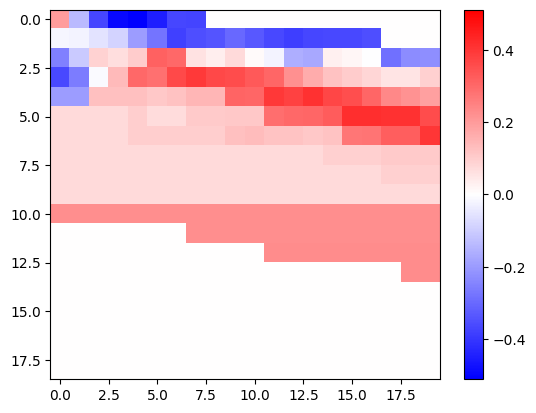

In [ ]:
plt.imshow(silhouette_avgs, vmin=-np.abs(silhouette_avgs).max(), vmax=np.abs(silhouette_avgs).max(), cmap='bwr')
plt.colorbar()
plt.show()

In [ ]:
best_config = np.unravel_index(np.argmax(silhouette_avgs), silhouette_avgs.shape)
best_config

(5, 15)

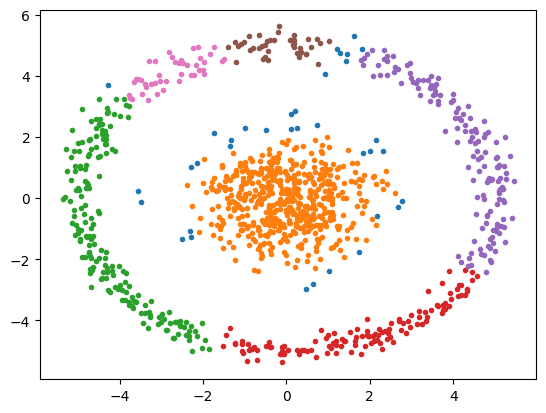

In [ ]:
dbscan = DBSCAN(eps=eps_values[best_config[0]], min_samples=min_samples_values[best_config[1]]).fit(data)
for label in np.unique(dbscan.labels_):
  plt.plot(data[dbscan.labels_ == label, 0], data[dbscan.labels_ == label, 1], '.', label="Cluster "+str(label))
#plt.legend()
plt.show()

# Ejercicio 2

En este segundo ejercicio se presenta otro dataset de juguete, donde hay tres clusters y cada uno de ellos tiene una densidad de puntos diferente al resto. El objetivo es probar las diferentes configuraciones de los cuatro algoritmos de clustering mencionados y analizar los resultados.

In [ ]:
sizes = np.array([10,100,1000])
avgs_x = np.array([1,4,10])
avgs_y = np.array([5,0,10])

In [ ]:
data3 = []

for a_x,a_y,s in zip(avgs_x,avgs_y,sizes):
    cx = []
    cy = []
    for  i in range(s):
        cx.append(random.gauss(a_x,1))
        cy.append(random.gauss(a_y,1))
    cx = np.array(cx)
    cy = np.array(cy)
    aux = np.vstack((cx,cy)).T
    data3.append(aux)

data = np.concatenate(data3, axis=0)

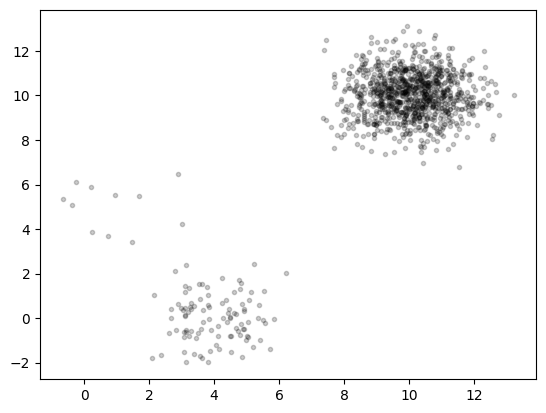

In [ ]:
plt.plot(data[:,0],data[:,1],'k.',alpha=0.2)
plt.show()

## Aglomerativo

Prueba diferentes técnicas de distancia (method) para poder partir correctamente las dos distribuciones.

In [ ]:
# Prueba single, average, complete, centroid
Z = linkage(data, method='complete', metric='euclidean')

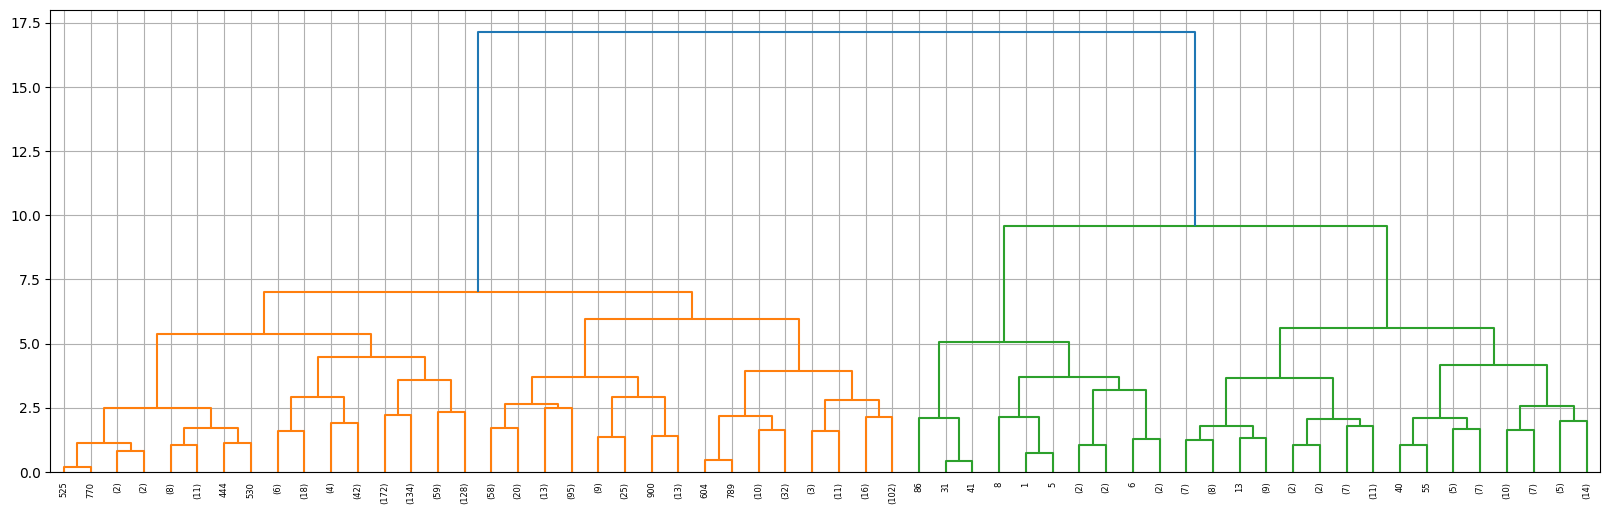

In [ ]:
plt.figure(figsize=(20, 6))
dn = dendrogram(Z, p=5, truncate_mode='level')
plt.grid()
plt.show()

In [ ]:
indices = fcluster(Z, 8.0, criterion='distance')
np.unique(indices)

array([1, 2, 3], dtype=int32)

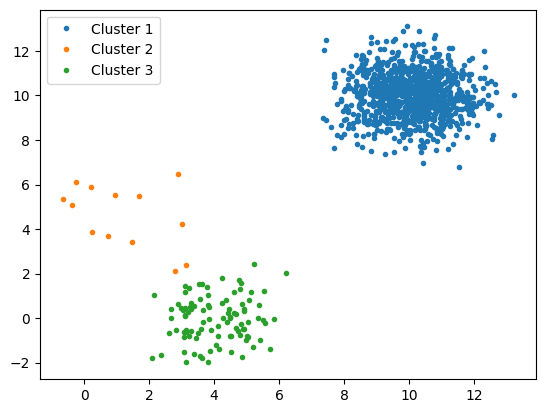

In [ ]:
for i in np.unique(indices):
  plt.plot(data[indices == i, 0], data[indices == i, 1], '.', label="Cluster "+str(i))
plt.legend()
plt.show()

## K-Means

Prueba diferentes valores de K para poder partir correctamente las dos distribuciones.

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=30).fit(data)

In [ ]:
kmeans.cluster_centers_

array([[10.82219175,  9.87977221],
       [ 3.72248336,  0.49935677],
       [ 9.21502062, 10.19907099]])

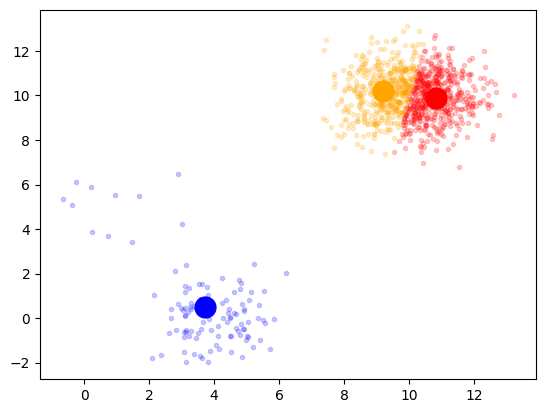

In [ ]:
for label, color in zip(np.unique(kmeans.labels_), ['red', 'blue', 'orange', 'green', 'purple', 'grey', 'cyan']):
  plt.plot(data[kmeans.labels_ == label, 0], data[kmeans.labels_ == label, 1], '.', color=color, alpha=0.2, label="Cluster "+str(label))
  plt.plot([kmeans.cluster_centers_[label, 0]], [kmeans.cluster_centers_[label, 1]], 'o', markersize=15, color=color, label="Cluster center "+str(label))
#plt.legend()
plt.show()

In [ ]:
silhouette_avgs = {}
for K in range(2, 10):
  kmeans = KMeans(n_clusters=K,n_init=30).fit(data)
  silhouette_avgs["K = " + str(K)] = silhouette_score(data, kmeans.labels_)

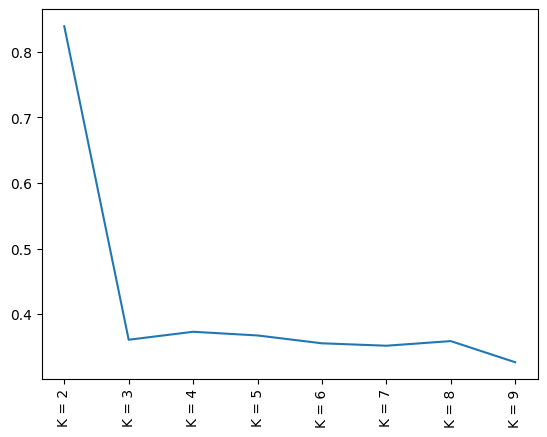

In [ ]:
silh_by_clusters = pd.Series(silhouette_avgs)
silh_by_clusters.plot()
plt.xticks(rotation=90)
plt.show()

## EM

Prueba diferentes valores de K para poder partir correctamente las dos distribuciones.

In [ ]:
em = GaussianMixture(n_components=3, n_init=30).fit(data)

In [ ]:
em.means_

array([[ 1.00652141e+01,  1.00301619e+01],
       [ 9.02976897e-01,  5.01077410e+00],
       [ 4.03651651e+00, -3.11932532e-03]])

In [ ]:
labels = em.predict(data)

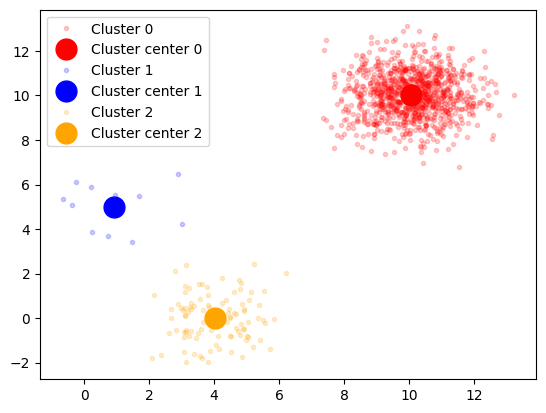

In [ ]:
for label, color in zip(np.unique(labels), ['red', 'blue', 'orange', 'green', 'purple', 'grey', 'cyan']):
  plt.plot(data[labels == label, 0], data[labels == label, 1], '.', color=color, alpha=0.2, label="Cluster "+str(label))
  plt.plot([em.means_[label, 0]], [em.means_[label, 1]], 'o', markersize=15, color=color, label="Cluster center "+str(label))
plt.legend()
plt.show()

In [ ]:
silhouette_avgs = {}
for K in range(2, 10):
  em = GaussianMixture(n_components=K, n_init=30).fit(data)
  labels = em.predict(data)
  silhouette_avgs["K = " + str(K)] = silhouette_score(data, labels)

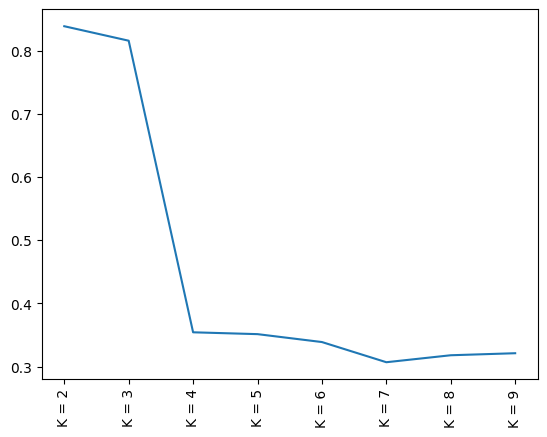

In [ ]:
silh_by_clusters = pd.Series(silhouette_avgs)
silh_by_clusters.plot()
plt.xticks(rotation=90)
plt.show()

## DBSCAN

Prueba diferentes valores de eps y minPts para poder partir correctamente las dos distribuciones.

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(data)

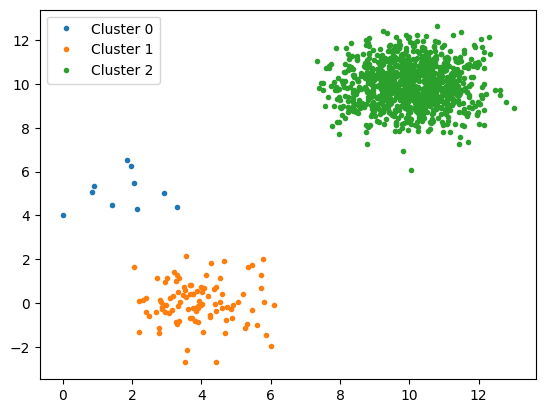

In [ ]:
for label in np.unique(dbscan.labels_):
  plt.plot(data[dbscan.labels_ == label, 0], data[dbscan.labels_ == label, 1], '.', label="Cluster "+str(label))
plt.legend()
plt.show()